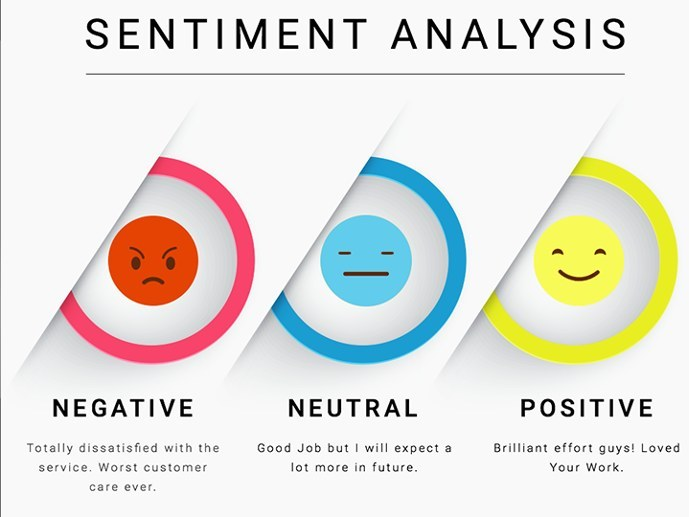

### Table of Contents  
* [Importing dataset](#firstheading)  
* [Data Inspection Part](#secondheading)
* [Data Visualization](#thirdheading)
* [Sentiment Analysis](#fourthheading)
    * [Model evaluation](#evaluation)

# Importing dataset 📨 <a class="anchor" id="firstheading"></a>

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loading dataset
df = pd.read_csv(r'.\amazon_alexa.tsv', sep='\t')

# Data Inspection Part 🧐<a class="anchor" id="secondheading"></a>

In [3]:
# viewing dataframe
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# getting shape
df.shape

(3150, 5)

In [5]:
# getting information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# checking for null values
df.isnull().sum() / len(df)

rating              0.0
date                0.0
variation           0.0
verified_reviews    0.0
feedback            0.0
dtype: float64

* There is no blank entry in our data. So, no need of data cleaning.

# Data Visualization 📈<a class="anchor" id="thirdheading"></a>

#### Let's visualize count of unique entries with useful features

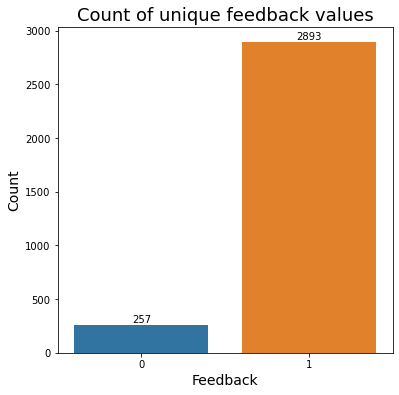

In [7]:
# counting entries by unique feedback value
plt.figure(figsize=(6, 6))
ax=sns.countplot(df['feedback'])
plt.title('Count of unique feedback values', fontsize=18)
plt.xlabel('Feedback', fontsize=14)
plt.ylabel('Count', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 25,rect.get_height(),horizontalalignment='center')

* There are 2893 entries with positive feedback.
* And, 257 entries with negative feedback.

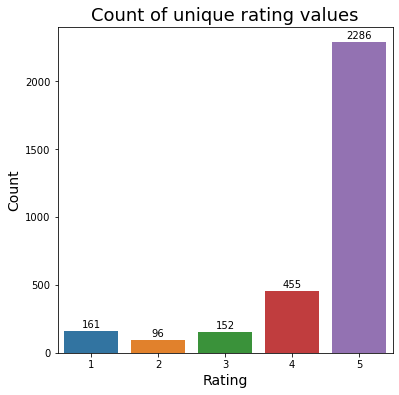

In [8]:
# counting entries by unique rating value
plt.figure(figsize=(6, 6))
ax=sns.countplot(df['rating'])
plt.title('Count of unique rating values', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 25,rect.get_height(),horizontalalignment='center')

* Rating 5 is maximum among all. It means feedback is in positive favour and people are comfortable and happy as well.

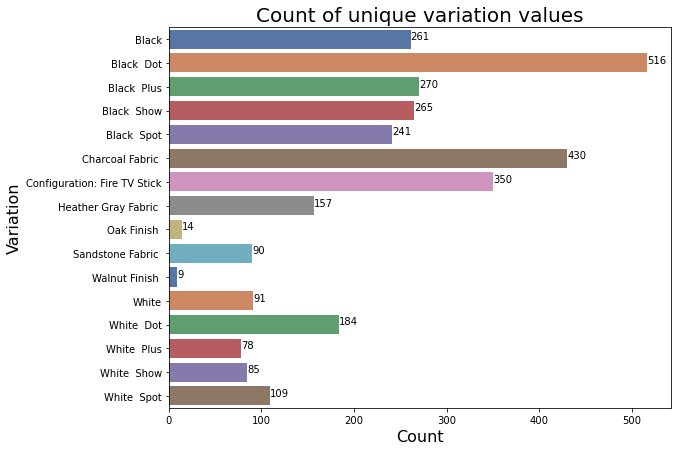

In [9]:
# counting entries by unique variation value
a = df.groupby('variation').count()['rating']
plt.figure(figsize=(9, 7))
sns.barplot(a.values, a.index, palette='deep')
plt.title('Count of unique variation values', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Variation', fontsize=16)

for index, value in enumerate(a):
    plt.text(value, index, str(value))

#### Let's create a length column for visualization

In [10]:
# creating new column with review length
df['length'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [11]:
# printing maximum length of review
max(df['length'])

2851

* There is a review with length 2851 is much similar to an essay.

In [12]:
# printing minimum length of review
min(df['length'])

1

* There is a review as short as single character.

In [13]:
# printing average length of review
round(sum(df['length']) / len(df))

132

* Average length of review is 132.

#### Let's checkout above length reviews

In [14]:
# printing maximum length review
df[df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

* Above is the longest review in out dataset.

In [15]:
# printing minimum length review
df[df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

* Shortest review is just an emoji. Nice!

In [16]:
# printing average length review
df[df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

* It is giving only one review due to average length.

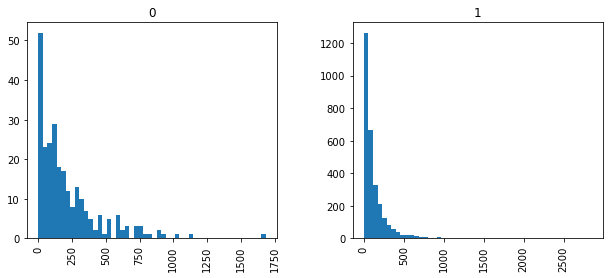

In [17]:
# plot review length with feedback
df.hist(column='length', by='feedback', bins=50,figsize=(10,4))
plt.show()

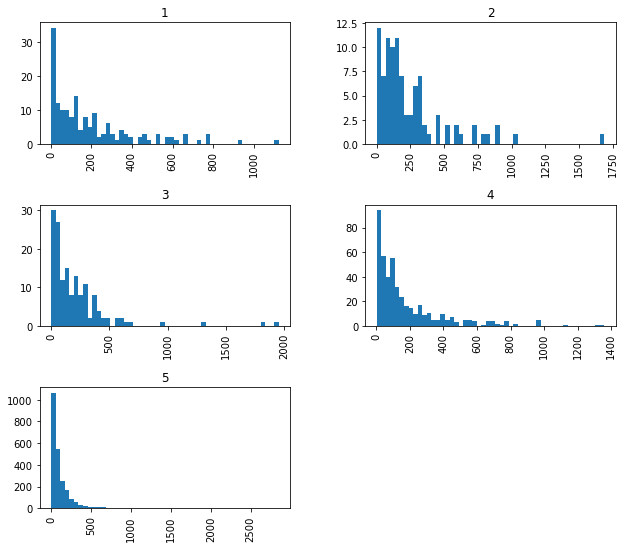

In [18]:
# plot review length with rating
df.hist(column='length', by='rating', bins=50, figsize=(10, 9))
plt.show()

# Sentiment Analysis 😀😐😔<a class="anchor" id="fourthheading"></a>

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [20]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [21]:
corpus = []
ps = PorterStemmer()
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i])
    review = review.lower().split()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    corpus.append(' '.join(review))

* In above steps:
>1. Firslty, I had took only those words which starting from alphabets and replaced other characters with ' '.
>2. Then applied lowercase to each word and split them.
>3. Applied Porter Stemmer algorithm for stemming each word to its base by removing stopwords.
>4. At last join each word with ' ' and append it to list named corpus.

In [22]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [23]:
# creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer as CV
cvt = CV(max_features=1500)
cvt

CountVectorizer(max_features=1500)

In [24]:
# applying fit and transform method simultaneously and convert result into array
X = cvt.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# taking feedback column as target variable
y = df['feedback'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [27]:
# fitting linear support vector machine classifier
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [28]:
# predicting
y_predicted = model.predict(X_test)

## Model evaluation <a class="anchor" id="evaluation"></a>

**Confusion Matrix**:- A confusion matrix prints the correct and also incorrect values in number count. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.
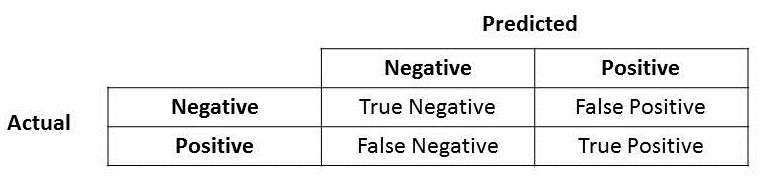

In [29]:
# getting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, y_test)
cm

array([[ 13,   3],
       [ 16, 283]], dtype=int64)

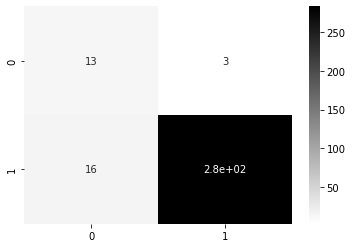

In [30]:
# plotting confusion matrix
sns.heatmap(cm, annot = True, cmap='binary')
plt.show()

**Accuracy**:- Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
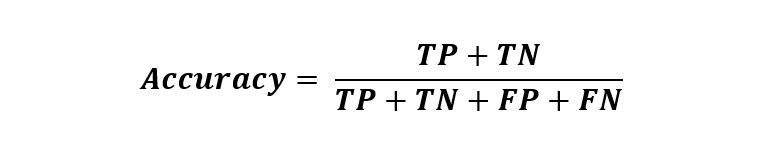

In [31]:
# checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_predicted, y_test)

0.9396825396825397

* Our model has a accuracy of **93.97%** which is good accuracy.

**Recall**:- Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
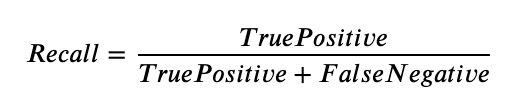

In [32]:
# getting recall score of our model
from sklearn.metrics import recall_score
recall_score(y_predicted, y_test)

0.9464882943143813

* Our model has a recall score of **94.65%**.

**Precision**:- Precision quantifies the number of positive class predictions that actually belong to the positive class. 
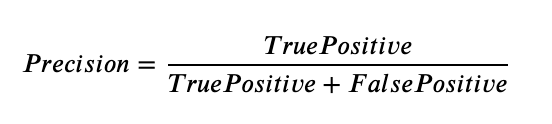

In [33]:
# getting precision score of our model
from sklearn.metrics import precision_score
precision_score(y_predicted, y_test)

0.9895104895104895

* Our model has a precision score of **98.95%**.

**F1 score**:- F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
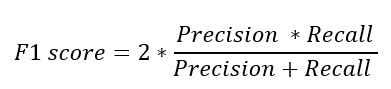

In [34]:
# getting f1 score of our model
from sklearn.metrics import f1_score
f1_score(y_predicted, y_test)

0.9675213675213675

* Our model has a f1 score of **96.75%**.